# ML-MAJOR-APR-ML041B15

## Objective:
### To predict the costs of used cars given the data collected from various sources and distributed across various locations in India.

## Features:

- Name: The brand and model of the car.
- Location: The location in which the car is being sold or is available for purchase.
- Year: The year or edition of the model.
- Kilometers_Driven: The total kilometres driven in the car by the previous owner(s) in KM.
- Fuel_Type: The type of fuel used by the car.
- Transmission: The type of transmission used by the car.
- Owner_Type: Whether the ownership is Firsthand, Second hand or other.
- Mileage: The standard mileage offered by the car company in kmpl or km/kg
- Engine: The displacement volume of the engine in cc.
- Power: The maximum power of the engine in bhp.
- Seats: The number of seats in the car.
- New_Price: The price of a new car of the same model.
- Price: The price of the used car in INR Lakhs.


#### For the above purpose we need to import some necessary modules and packages given as below:


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
%matplotlib inline
sns.set_style('darkgrid')

## Cleaning Data 

### Cleaning Training Data

In [2]:
train = pd.read_excel('Data_Train.xlsx')

In [3]:
train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [4]:
train.shape

(6019, 12)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 564.4+ KB


In [6]:
train.describe()

,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,2013.358199,5.873838e+04,5.278735,9.479468
std,3.269742,9.126884e+04,0.808840,11.187917
min,1998.000000,1.710000e+02,0.000000,0.440000
25%,2011.000000,3.400000e+04,5.000000,3.500000
50%,2014.000000,5.300000e+04,5.000000,5.640000
75%,2016.000000,7.300000e+04,5.000000,9.950000
max,2019.000000,6.500000e+06,10.000000,160.000000


In [7]:
train.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
dtype: int64

In [8]:
print("The percentage of null objects of Mileage column :",(2/train['Mileage'].size)*100,"%")

The percentage of null objects of Mileage column : 0.033228110981890685 %


In [9]:
print("The percentage of null objects of Engine column :",(36/train['Engine'].size)*100,"%")

The percentage of null objects of Engine column : 0.5981059976740323 %


In [10]:
print("The percentage of null objects of Power column :",(36/train['Power'].size)*100,"%")

The percentage of null objects of Power column : 0.5981059976740323 %


In [11]:
print("The percentage of null objects of Seat column :",(42/train['Seats'].size)*100,"%")

The percentage of null objects of Seat column : 0.6977903306197043 %


In [12]:
train.groupby('Seats')['Price'].nunique()

Seats
0.0        1
2.0       15
4.0       81
5.0     1161
6.0       30
7.0      390
8.0       97
9.0        3
10.0       4
Name: Price, dtype: int64

In [13]:
train.groupby('Mileage')['Price'].nunique()

Mileage
0.0 kmpl      59
10.0 kmpl     10
10.1 kmpl      7
10.13 kmpl     3
10.2 kmpl      6
              ..
9.52 kmpl      2
9.7 kmpl       1
9.74 kmpl      2
9.8 kmpl       4
9.9 kmpl       3
Name: Price, Length: 442, dtype: int64

In [14]:
train.groupby('Engine')['Price'].nunique()

Engine
1047 CC      4
1061 CC     23
1086 CC     69
1120 CC     37
1150 CC      7
          ... 
970 CC       1
993 CC      12
995 CC       8
998 CC     117
999 CC      26
Name: Price, Length: 146, dtype: int64

In [15]:
train.groupby('Power')['Price'].nunique()

Power
100 bhp      48
100.6 bhp    33
101 bhp       4
102 bhp      50
102.5 bhp     8
             ..
98.82 bhp     2
98.96 bhp     8
99 bhp       17
99.6 bhp      5
null bhp     74
Name: Price, Length: 372, dtype: int64

#### From the above, we can see the  columns of Mileage, Seats, Engine and Power have zero as a data. For our convenience, we consider it as an empty data and will impute it with mean or mode.
#### Also, the columns of Mileage, Engine and Power are of string types and so we need to remove the string associated with it and convert it to float type

In [16]:
train['Mileage'] = train['Mileage'].str.replace(' km/kg', '')
train['Mileage'] = train['Mileage'].str.replace(' kmpl', '')
train['Mileage'] = pd.to_numeric(train['Mileage'], errors='coerce')

#### We find that the column of Mileage contains unit as either "kg/gm" or "kmpl" as units. 

In [17]:
train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968 CC,140.8 bhp,5.0,17.74


In [18]:
train['Engine'] = train['Engine'].str.replace(' CC', '')
train['Engine'] = pd.to_numeric(train['Engine'], errors='coerce')

#### We find that the column of Engine contains unit as "CC"as units. 

In [19]:
train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.8 bhp,5.0,17.74


In [20]:
train['Power'] = train['Power'].str.replace(' bhp', '')
train['Power'] = train['Power'].str.replace('null', '0.0')
train['Power'] = pd.to_numeric(train['Power'], errors='coerce')

#### We find that the column of Power contains unit as "bhp"as units. 

In [21]:
train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74


#### Now, we replace the null values as well as "0.0" with the mean of the non-null data of their respective columns (Mileage, Engine, Power and Seat)

In [22]:
train['Mileage'].replace(0.0,np.nan,inplace=True)
print("Mean of Mileage =",np.mean(train['Mileage']))
train['Mileage'].fillna(value=np.mean(train['Mileage']),inplace=True)

Mean of Mileage = 18.342252479408305


In [23]:
train['Engine'].replace(0.0,np.nan,inplace=True)
print("Mean of Engine =",np.mean(train['Engine']))
train['Engine'].fillna(value=np.mean(train['Engine']),inplace=True)

Mean of Engine = 1621.276449941501


In [24]:
train['Power'].replace(0.0,np.nan,inplace=True)
print("Mean of Power =",np.mean(train['Power']))
train['Power'].fillna(value=np.mean(train['Power']),inplace=True)

Mean of Power = 113.25304969366915


In [25]:
train['Seats'].replace(0.0,np.nan,inplace=True)
print("Mean of Seats = ",np.mean(train['Seats']))
train['Seats'].fillna(value=np.mean(train['Seats']),inplace=True)

Mean of Seats =  5.2796184738955825


In [26]:
train.isna().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [27]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6019 non-null   float64
 8   Engine             6019 non-null   float64
 9   Power              6019 non-null   float64
 10  Seats              6019 non-null   float64
 11  Price              6019 non-null   float64
dtypes: float64(5), int64(2), object(5)
memory usage: 564.4+ KB


In [28]:
train.describe()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
count,6019.000000,6.019000e+03,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000
mean,2013.358199,5.873838e+04,18.342252,1621.276450,113.253050,5.279618,9.479468
std,3.269742,9.126884e+04,4.151120,599.553865,53.231019,0.803134,11.187917
min,1998.000000,1.710000e+02,6.400000,72.000000,34.200000,2.000000,0.440000
25%,2011.000000,3.400000e+04,15.400000,1198.000000,78.000000,5.000000,3.500000
50%,2014.000000,5.300000e+04,18.342252,1493.000000,98.600000,5.000000,5.640000
75%,2016.000000,7.300000e+04,21.100000,1969.000000,138.030000,5.000000,9.950000
max,2019.000000,6.500000e+06,33.540000,5998.000000,560.000000,10.000000,160.000000


#### So we have succesfully imputed all the empty values and got the numeric values from the columns of Mileage, Power, Engine and Seats of Training Data

### Cleaning testing data

In [29]:
test = pd.read_excel('Data_Test.xlsx')

In [30]:
test.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0


In [31]:
test.isna().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               0
Engine               10
Power                10
Seats                11
dtype: int64

In [32]:
test['Mileage'] = test['Mileage'].str.replace(' km/kg', '')
test['Mileage'] = test['Mileage'].str.replace(' kmpl', '')
test['Mileage'] = pd.to_numeric(test['Mileage'], errors='coerce')

In [33]:
test.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26,998 CC,58.2 bhp,4.0
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.70,796 CC,47.3 bhp,5.0
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68,2393 CC,147.8 bhp,7.0
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59,1364 CC,null bhp,5.0
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.50,1197 CC,82.85 bhp,5.0


In [34]:
test['Engine'] = test['Engine'].str.replace(' CC', '')
test['Engine'] = pd.to_numeric(test['Engine'], errors='coerce')

In [35]:
test.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26,998.0,58.2 bhp,4.0
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.70,796.0,47.3 bhp,5.0
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68,2393.0,147.8 bhp,7.0
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59,1364.0,null bhp,5.0
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.50,1197.0,82.85 bhp,5.0


In [36]:
test['Power'] = test['Power'].str.replace(' bhp', '')
test['Power'] = test['Power'].str.replace('null', '0.0')
test['Power'] = pd.to_numeric(test['Power'], errors='coerce')

In [37]:
test.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26,998.0,58.20,4.0
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.70,796.0,47.30,5.0
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68,2393.0,147.80,7.0
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59,1364.0,0.00,5.0
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.50,1197.0,82.85,5.0


In [38]:
test['Mileage'].replace(0.0,np.nan,inplace=True)
print("Mean of Mileage =",np.mean(test['Mileage']))
test['Mileage'].fillna(value=np.mean(test['Mileage']),inplace=True)

Mean of Mileage = 18.36735462735463


In [39]:
test['Engine'].replace(0.0,np.nan,inplace=True)
print("Mean of Engine =",np.mean(test['Engine']))
test['Engine'].fillna(value=np.mean(test['Engine']),inplace=True)

Mean of Engine = 1593.5849673202615


In [40]:
test['Power'].replace(0.0,np.nan,inplace=True)
print("Mean of Power =",np.mean(test['Power']))
test['Power'].fillna(value=np.mean(test['Power']),inplace=True)

Mean of Power = 110.38042013311147


In [41]:
test['Seats'].replace(0.0,np.nan,inplace=True)
print("Mean of Seats =",np.mean(test['Seats']))
test['Seats'].fillna(value=np.mean(test['Seats']),inplace=True)

Mean of Seats = 5.28454619787408


In [42]:
test.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26,998.0,58.20000,4.0
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.70,796.0,47.30000,5.0
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68,2393.0,147.80000,7.0
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59,1364.0,110.38042,5.0
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.50,1197.0,82.85000,5.0


In [43]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               1234 non-null   object 
 1   Location           1234 non-null   object 
 2   Year               1234 non-null   int64  
 3   Kilometers_Driven  1234 non-null   int64  
 4   Fuel_Type          1234 non-null   object 
 5   Transmission       1234 non-null   object 
 6   Owner_Type         1234 non-null   object 
 7   Mileage            1234 non-null   float64
 8   Engine             1234 non-null   float64
 9   Power              1234 non-null   float64
 10  Seats              1234 non-null   float64
dtypes: float64(4), int64(2), object(5)
memory usage: 106.2+ KB


In [44]:
test.isna().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
dtype: int64

# EDA - Univariate Analysis

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('darkgrid')

In [46]:
train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74


In [47]:
train.shape

(6019, 12)

In [48]:
train.columns.tolist()

['Name',
 'Location',
 'Year',
 'Kilometers_Driven',
 'Fuel_Type',
 'Transmission',
 'Owner_Type',
 'Mileage',
 'Engine',
 'Power',
 'Seats',
 'Price']

In [49]:
train.describe() #summary statistics

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
count,6019.000000,6.019000e+03,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000
mean,2013.358199,5.873838e+04,18.342252,1621.276450,113.253050,5.279618,9.479468
std,3.269742,9.126884e+04,4.151120,599.553865,53.231019,0.803134,11.187917
min,1998.000000,1.710000e+02,6.400000,72.000000,34.200000,2.000000,0.440000
25%,2011.000000,3.400000e+04,15.400000,1198.000000,78.000000,5.000000,3.500000
50%,2014.000000,5.300000e+04,18.342252,1493.000000,98.600000,5.000000,5.640000
75%,2016.000000,7.300000e+04,21.100000,1969.000000,138.030000,5.000000,9.950000
max,2019.000000,6.500000e+06,33.540000,5998.000000,560.000000,10.000000,160.000000


Inferences:
- The mean price of cars is 9.4 lakhs
- The highest price is 160 lakhs
- The lowest price is 0.44 lakhs

### ANALYSIS ON LOCATION

In [50]:
train.Location.nunique() #the no. of locations

11

In [51]:
train.Location.unique() #the different locations

array(['Mumbai', 'Pune', 'Chennai', 'Coimbatore', 'Hyderabad', 'Jaipur',
       'Kochi', 'Kolkata', 'Delhi', 'Bangalore', 'Ahmedabad'],
      dtype=object)

In [52]:
train.Location.value_counts()

Mumbai        790
Hyderabad     742
Kochi         651
Coimbatore    636
Pune          622
Delhi         554
Kolkata       535
Chennai       494
Jaipur        413
Bangalore     358
Ahmedabad     224
Name: Location, dtype: int64

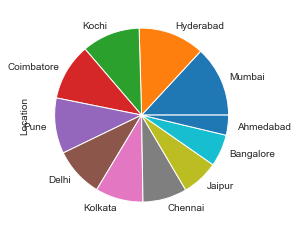

In [53]:
train['Location'].value_counts().plot.pie()

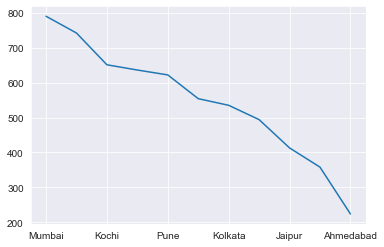

In [54]:
train.Location.value_counts().plot()

Inferences:
- There are 11 different locations
- The Maximum number of cars are from Mumbai
- The Minimum number of cars are from Ahmedabad

### ANALYSIS ON YEAR

In [55]:
train.Year.unique()

array([2010, 2015, 2011, 2012, 2013, 2016, 2018, 2014, 2017, 2007, 2009,
       2008, 2019, 2006, 2005, 2004, 2002, 2000, 2003, 1999, 2001, 1998],
      dtype=int64)

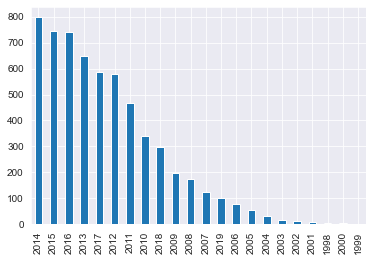

In [56]:
train.Year.value_counts().plot(kind='bar')

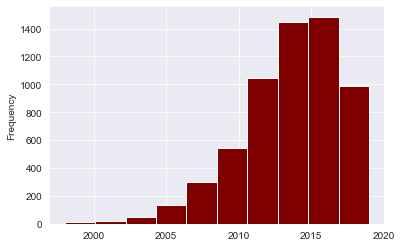

In [57]:
train.Year.plot(kind='hist',color='Maroon')

Inferences:
- The maximum number of cars are from the year 2014 although the latest year in the data list is 2019 which had considerably lesser no. of cars 

### ANALYSIS ON KILOMETERS DRIVEN

In [58]:
print("Mean kilometers driven in the data is:",train.Kilometers_Driven.mean())

Mean kilometers driven in the data is: 58738.38029573019


In [59]:
print("Maximum kilometers driven in the data is:",train.Kilometers_Driven.max())

Maximum kilometers driven in the data is: 6500000


In [60]:
print("Minimum kilometers driven in the data is:",train.Kilometers_Driven.min())

Minimum kilometers driven in the data is: 171


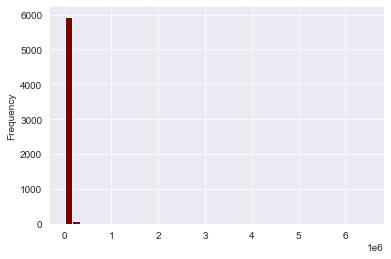

In [61]:
train.Kilometers_Driven.plot(kind='hist',color='Maroon',bins=40)

### ANALYSIS ON FUEL TYPE

In [62]:
train.Fuel_Type.unique()

array(['CNG', 'Diesel', 'Petrol', 'LPG', 'Electric'], dtype=object)

In [63]:
train.Fuel_Type.value_counts()

Diesel      3205
Petrol      2746
CNG           56
LPG           10
Electric       2
Name: Fuel_Type, dtype: int64

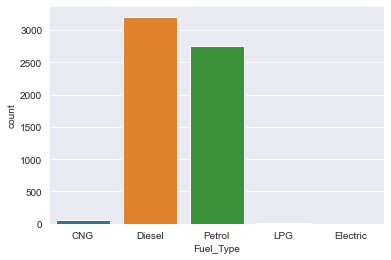

In [64]:
sns.countplot(data=train,x='Fuel_Type')

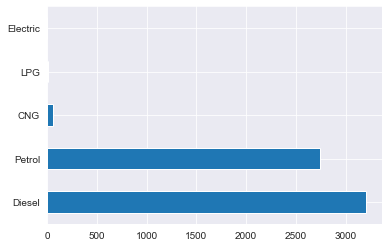

In [65]:
train.Fuel_Type.value_counts().plot(kind='barh')

Inferences
- Maximum no. of cars are diesal cars
- Only two cars are electric cars and is at the minimum 

### ANALYSIS ON TRANSMISSION

In [66]:
train.Transmission.value_counts()

Manual       4299
Automatic    1720
Name: Transmission, dtype: int64

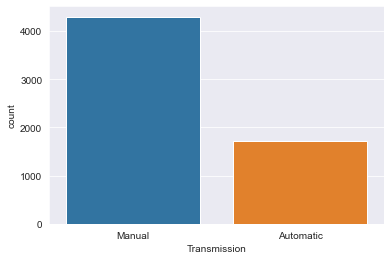

In [67]:
sns.countplot(data=train,x='Transmission')

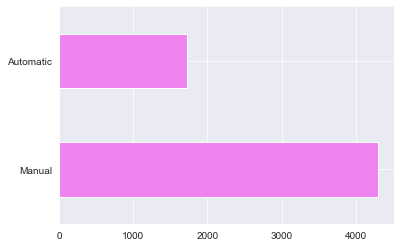

In [68]:
train.Transmission.value_counts().plot(kind='barh',color="violet")

Inferences:
- The number of manual cars are greater than the automatic cars

### ANALYSIS ON OWNER TYPE

In [69]:
train.Owner_Type.value_counts()

First             4929
Second             968
Third              113
Fourth & Above       9
Name: Owner_Type, dtype: int64

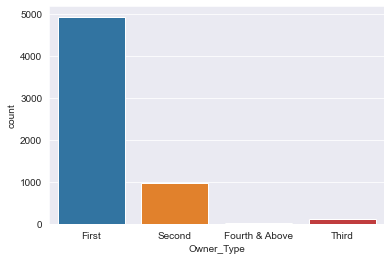

In [70]:

sns.countplot(x='Owner_Type',data=train)

Inferences:
- Around 5000 cars are firsthand cars and less than 10 belong to the fourth or above category

### ANALYSIS ON MILEAGE

In [71]:
print("Minimum Mileage in the data is:",train.Mileage.min())
print("Maximum Mileage in the data is:",train.Mileage.max())
print("Range of Mileage is from {} to {}".format(train.Mileage.min(),train.Mileage.max()))

Minimum Mileage in the data is: 6.4
Maximum Mileage in the data is: 33.54
Range of Mileage is from 6.4 to 33.54


In [72]:
train.Mileage.mean()

18.342252479408305

In [73]:
train[train.Mileage > 18.33].Name.count()

3011

In [74]:
train[train.Mileage < 18.33].Name.count()

3003

Inferences 
- 2941 cars have mileage above the mean mileage
- 3073 cars have mileage below the mean mileage

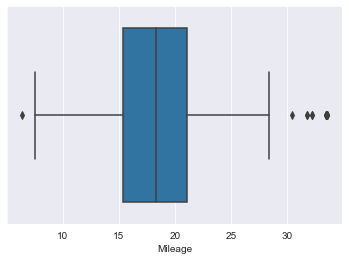

In [75]:
sns.boxplot(train['Mileage'])

### ANALYSIS ON ENGINE

In [76]:
print("Minimum engine volume in the data is:",train.Engine.min())
print("Maximum engine volume in the data is:",train.Engine.max())
print("Range of engine volume is from {} to {}".format(train.Engine.min(),train.Engine.max()))

Minimum engine volume in the data is: 72.0
Maximum engine volume in the data is: 5998.0
Range of engine volume is from 72.0 to 5998.0


In [77]:
train[train.Engine==72].Name

4446    Mahindra E Verito D4
Name: Name, dtype: object

In [78]:
train[train.Engine==5998].Name

5521    Bentley Continental Flying Spur
Name: Name, dtype: object

In [79]:
train.Engine.mean()

1621.276449941501

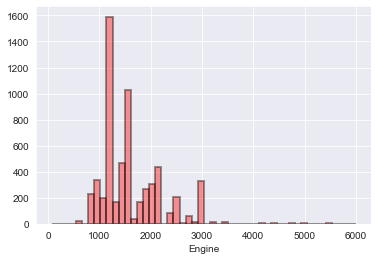

In [80]:
sns.distplot(train['Engine'],kde=False,hist_kws=dict(edgecolor="k", linewidth=2), color='red')

### ANALYSIS ON POWER

In [81]:
print("Minimum power in the data is:",train.Power.min())
print("Maximum power in the data is:",train.Power.max())
print("Range of power is from {} to {}".format(train.Power.min(),train.Power.max()))

Minimum power in the data is: 34.2
Maximum power in the data is: 560.0
Range of power is from 34.2 to 560.0


In [82]:
train[train.Power==34.2].Name.count()

7

In [83]:
train[train.Power==34.2].Name

790         Maruti Omni E 8 Str STD
1008    Maruti Omni E MPI STD BS IV
1912    Maruti Omni E MPI STD BS IV
2196       Maruti Omni MPI STD BSIV
2849     Maruti Omni MPI CARGO BSIV
3091    Maruti Omni E MPI STD BS IV
3321       Maruti Omni MPI STD BSIV
Name: Name, dtype: object

In [84]:
train[train.Power==560.0].Name.count()

1

In [85]:
train[train.Power==560].Name

5781    Lamborghini Gallardo Coupe
Name: Name, dtype: object

In [86]:
train.Power.mean()

113.25304969366915

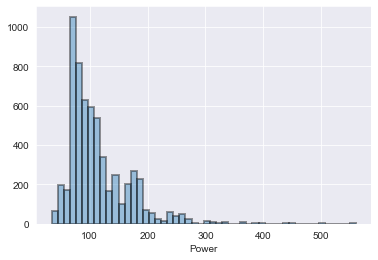

In [87]:
sns.distplot(train['Power'],kde=False,hist_kws=dict(edgecolor="k", linewidth=2))

Inferences 
- 7 cars have minimum power
- 1 car has maximum power

### ANALYSIS ON SEATS

In [88]:
print("Minimum seats in the data is:",train.Seats.min())
print("Maximum seats in the data is:",train.Seats.max())

Minimum seats in the data is: 2.0
Maximum seats in the data is: 10.0


In [89]:
train.Seats.mean()

5.2796184738955825

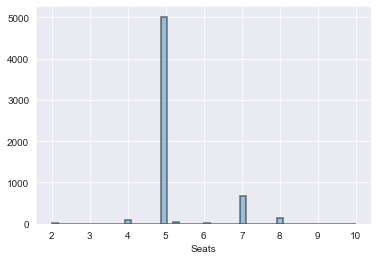

In [90]:
sns.distplot(train['Seats'],kde=False,hist_kws=dict(edgecolor="k", linewidth=2))

In [91]:
train.Seats.value_counts()

5.000000     5014
7.000000      674
8.000000      134
4.000000       99
5.279618       43
6.000000       31
2.000000       16
10.000000       5
9.000000        3
Name: Seats, dtype: int64

Inferences:
- Maximum no. of cars are 5 seaters followed by 7 seaters

### ANALYSIS ON PRICE

In [92]:
print("Minimum price in the data is:",train.Price.min())
print("Maximum price in the data is:",train.Price.max())
print("Price range is from {} to {}".format(train.Price.min(),train.Price.max()))

Minimum price in the data is: 0.44
Maximum price in the data is: 160.0
Price range is from 0.44 to 160.0


In [93]:
train.Price.mean()

9.47946835022429

In [94]:
train[train.Price==0.44].Name #cheapest car

1713    Tata Nano Lx
Name: Name, dtype: object

In [95]:
train[train.Price==160].Name #costliest car

4079    Land Rover Range Rover 3.0 Diesel LWB Vogue
Name: Name, dtype: object

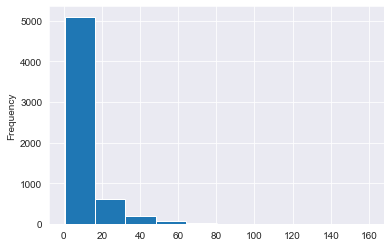

In [96]:
train.Price.plot(kind='hist')

Inferences: 
- Maximum no. of cars are in the price range of 0.44 to 20 lakhs

#### Univariate analysis is completed.

## EDA - Bivariate Analysis

In [97]:
train['Brand'] = train.Name.str.split().str.get(0)
train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,Maruti
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,Hyundai
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,Honda
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,Maruti
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,Audi


A new column brand from the column name is added for the analysis.

#### FACTORS AFFECTING PRICE 

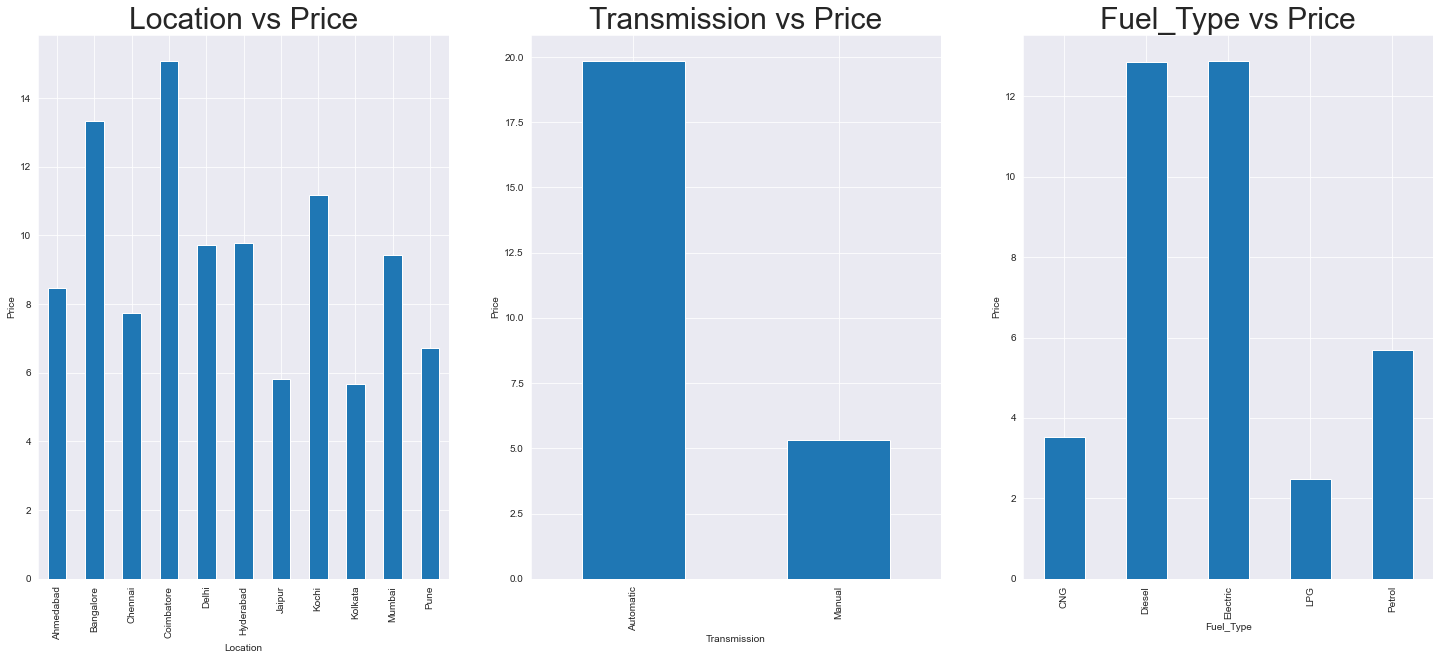

In [98]:
plt.figure(figsize=(25,10))
plt.subplot(131)
plt.title('Location vs Price',fontsize = 30)
plt.ylabel("Price")
train.groupby('Location')['Price'].mean().plot.bar()
plt.subplot(132)
plt.title('Transmission vs Price',fontsize = 30)
plt.ylabel("Price")
train.groupby('Transmission')['Price'].mean().plot.bar()
plt.subplot(133)
plt.title('Fuel_Type vs Price',fontsize = 30)
plt.ylabel("Price")
train.groupby('Fuel_Type')['Price'].mean().plot.bar()

INFERENCE: 
- The cars of Coimbatore have the maximum price and Kolkata has the minimum price car.
- Automatic cars have more price than manual ones.
- Diesel and Electric cars have almost the same price which is maximum and LPG cars have the lowest price.

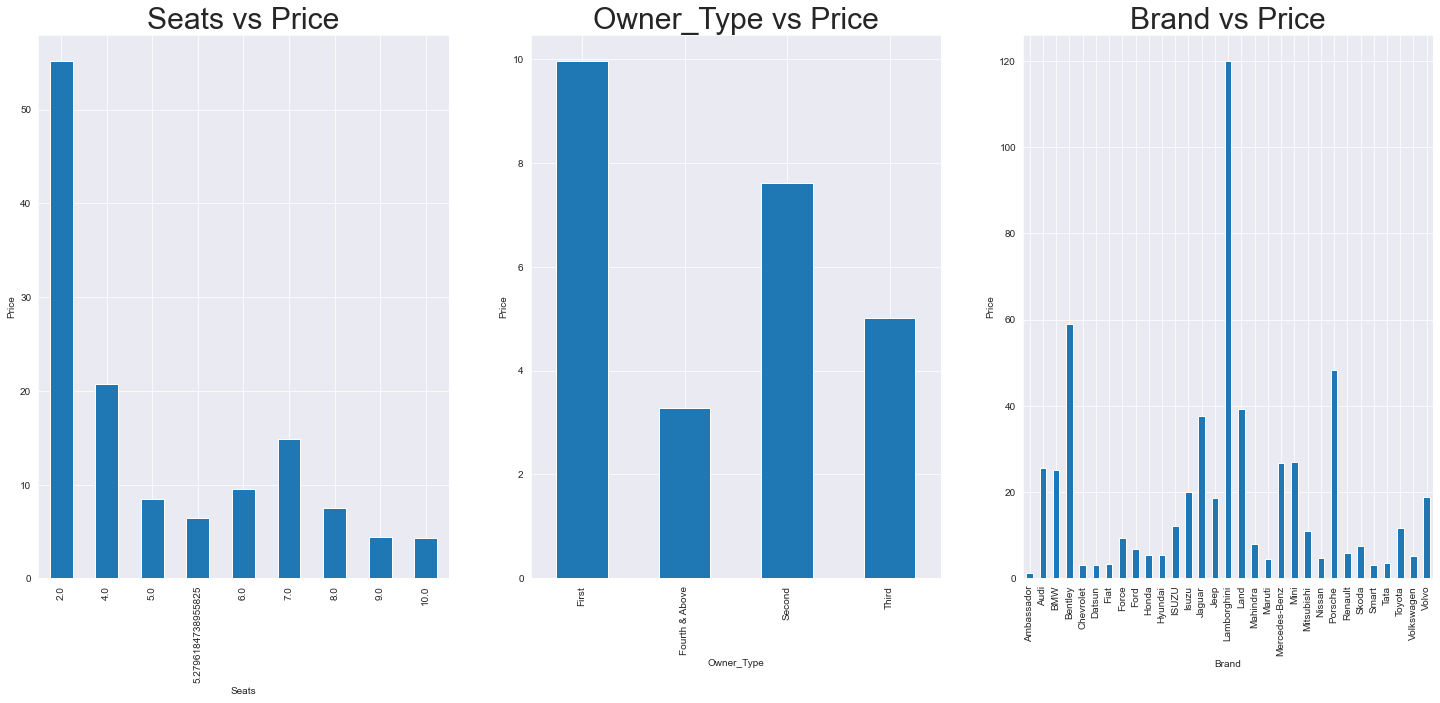

In [99]:
plt.figure(figsize=(25,10))
plt.subplot(131)
plt.title('Seats vs Price',fontsize = 30)
plt.ylabel("Price")
train.groupby('Seats')['Price'].mean().plot.bar()
plt.subplot(132)
plt.title('Owner_Type vs Price',fontsize = 30)
plt.ylabel("Price")
train.groupby('Owner_Type')['Price'].mean().plot.bar()
plt.subplot(133)
plt.title('Brand vs Price',fontsize = 30)
plt.ylabel("Price")
train.groupby('Brand')['Price'].mean().plot.bar()

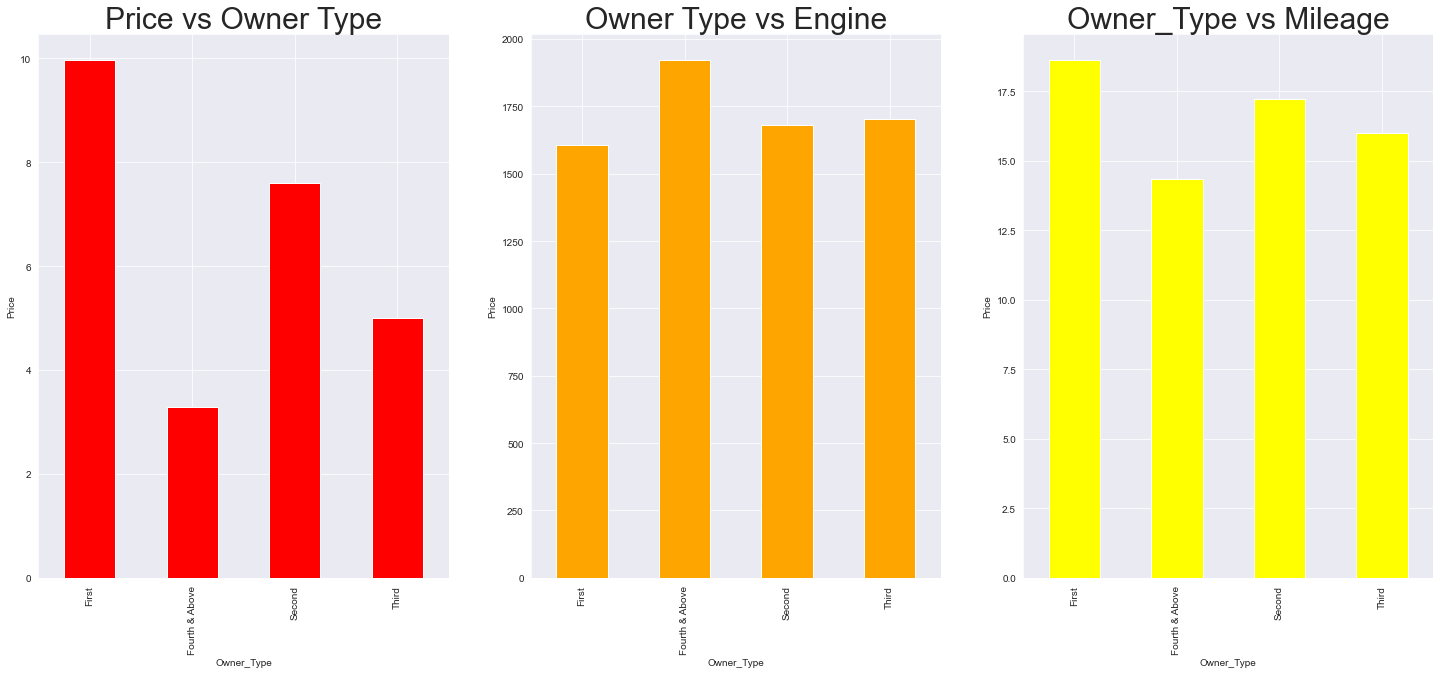

In [100]:
plt.figure(figsize=(25,10))
plt.subplot(131)
plt.title('Price vs Owner Type',fontsize = 30)
plt.ylabel("Price")
train.groupby('Owner_Type')['Price'].mean().plot.bar(color="red")
plt.subplot(132)
plt.title('Owner Type vs Engine',fontsize = 30)
plt.ylabel("Price")
train.groupby('Owner_Type')['Engine'].mean().plot.bar(color="orange")
plt.subplot(133)
plt.title('Owner_Type vs Mileage',fontsize = 30)
plt.ylabel("Price")
train.groupby('Owner_Type')['Mileage'].mean().plot.bar(color="yellow")

Inferences:
- The first handed cars are the most expensive.
- The fourth and above handed cars have the largest engine displacement volume.
- Mileage is best for first handed cars.

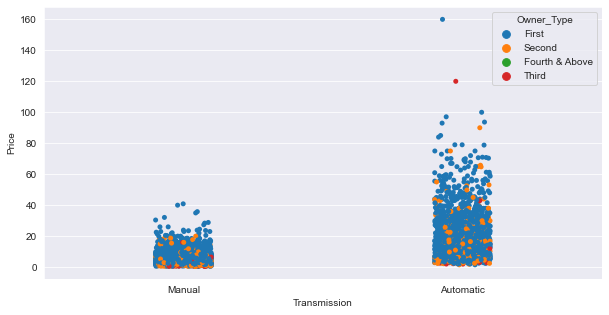

In [101]:
plt.figure(figsize=(10,5))
sns.stripplot(x='Transmission',y='Price',data=train,hue='Owner_Type')

INFERENCE:
- The 2 seater cars have the highest price and the price of cars with 9 and 10 seats is the minimum.
- The first handed cars are the most expensive and fourth and above are the cheapest.
- Lambhorgini has the highest price whereas Ambassador has the lowest.

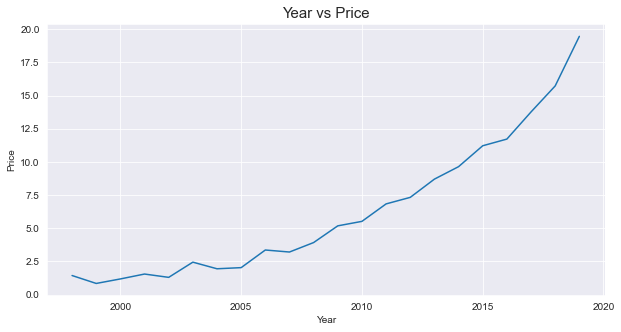

In [102]:
plt.figure(figsize=(10,5))
plt.title('Year vs Price',fontsize = 15)
plt.ylabel("Price")
train.groupby('Year')['Price'].mean().plot.line()

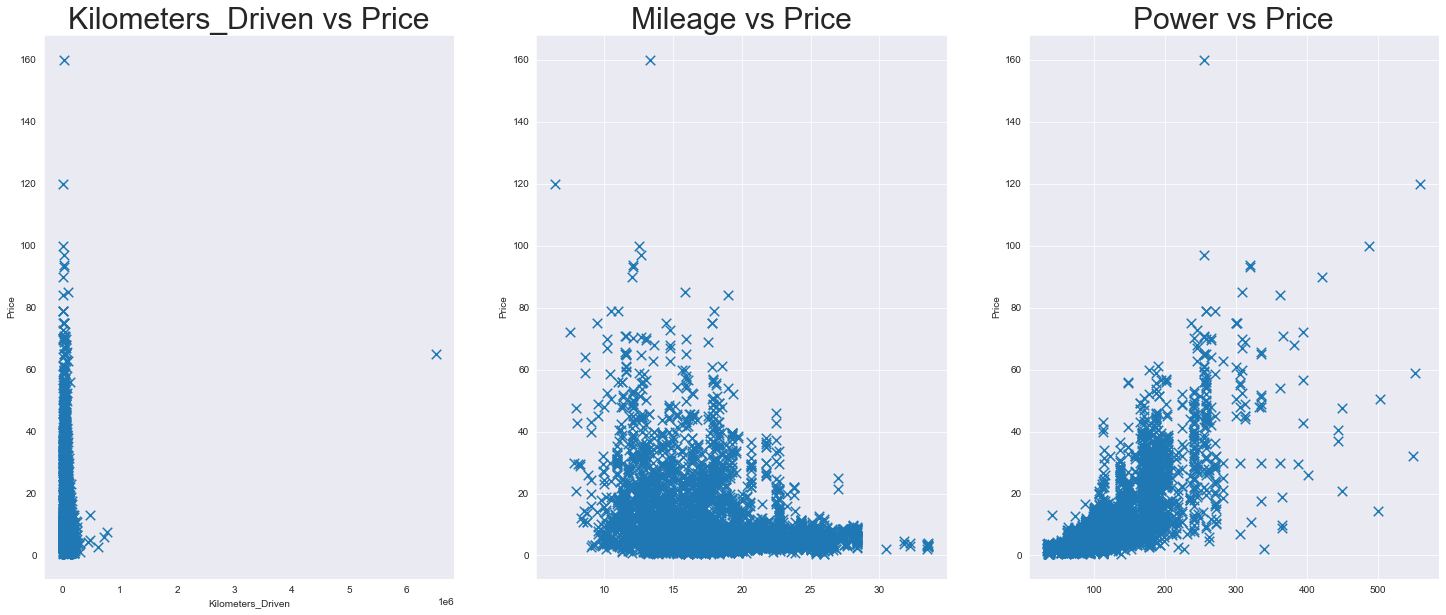

In [103]:
plt.figure(figsize=(25,10))
plt.subplot(131)
plt.scatter(train['Kilometers_Driven'], train['Price'], s=90,marker='x')
plt.title('Kilometers_Driven vs Price',fontsize = 30)
plt.xlabel('Kilometers_Driven')
plt.ylabel('Price')
plt.grid()
plt.subplot(132)
plt.title('Mileage vs Price',fontsize = 30)
plt.ylabel("Price")
plt.scatter(train['Mileage'], train['Price'], s=90,marker='x')
plt.subplot(133)
plt.title('Power vs Price',fontsize = 30)
plt.ylabel("Price")
plt.scatter(train['Power'], train['Price'], s=90,marker='x')
plt.show()

Since the relationship between variables is not clear from the above graphs, lmplot is used in the below graphs to determine the regression line that is followed by most of the points.

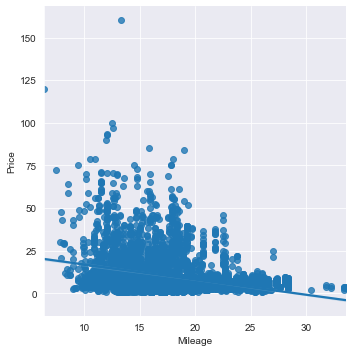

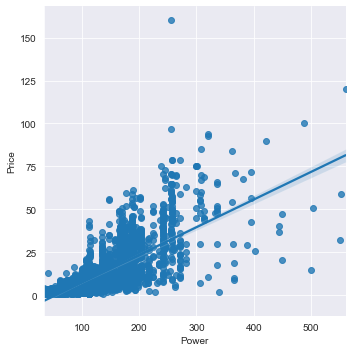

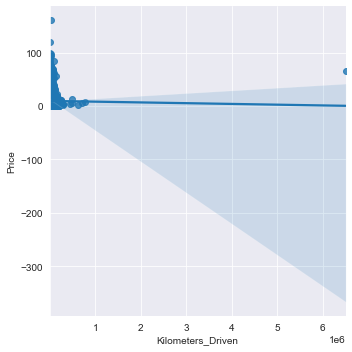

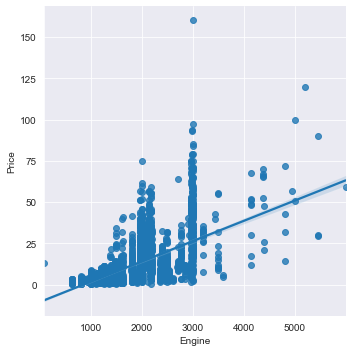

In [104]:
sns.lmplot('Mileage','Price',data=train)
sns.lmplot('Power','Price',data=train)
sns.lmplot('Kilometers_Driven','Price',data=train)
sns.lmplot('Engine','Price',data=train)

#### FACTORS AFFECTING MILEAGE

Text(0, 0.5, 'Mileage')

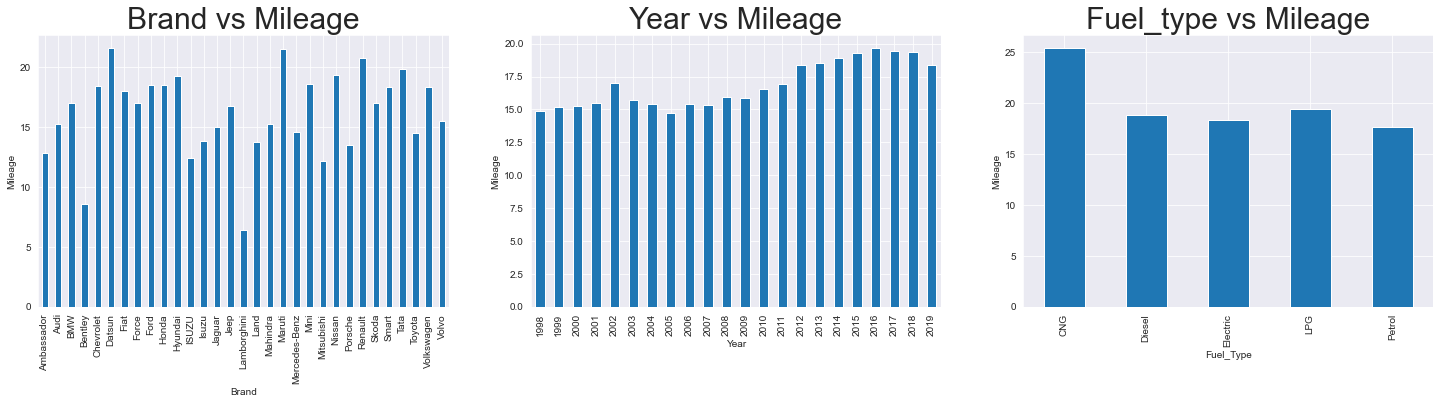

In [105]:
plt.figure(figsize=(25,5))
plt.subplot(131)
plt.title('Brand vs Mileage',fontsize = 30)
plt.ylabel("Mileage")
train.groupby('Brand')['Mileage'].mean().plot.bar()
plt.subplot(132)
train.groupby('Year')['Mileage'].mean().plot.bar()
plt.title('Year vs Mileage',fontsize = 30)
plt.ylabel("Mileage")
plt.subplot(133)
train.groupby('Fuel_Type')['Mileage'].mean().plot.bar()
plt.title('Fuel_type vs Mileage',fontsize = 30)
plt.ylabel("Mileage")

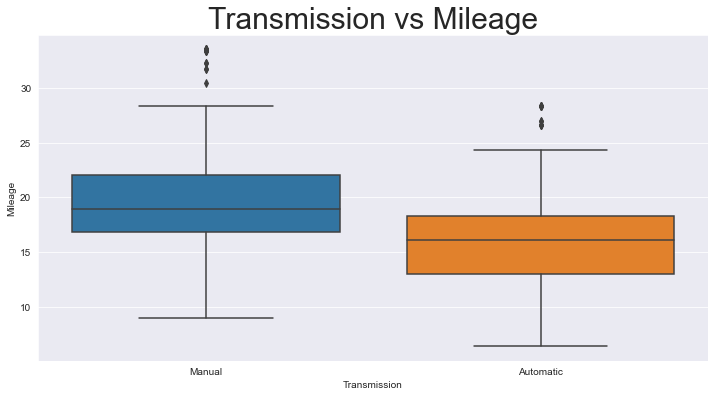

In [106]:
fig=plt.figure(figsize=(12,6))
plt.title('Transmission vs Mileage',fontsize = 30)
sns.boxplot(y='Mileage',x='Transmission',data=train)

Inferences:
- Datsun has the maximum mileage among all and Lambhorgini has the lowest mileage.
- The recent cars have slightly better mileage than old ones.
- CNG gives the worst mileage about 3 kmpl whereas the maximum- Diesel,Electric and Petrol are almost the same.
- Manual cars have a greater mileage than automatic cars.

#### FACTORS AFFECTING POWER

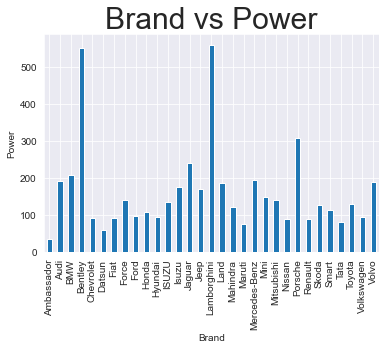

In [107]:
plt.title('Brand vs Power',fontsize = 30)
plt.ylabel("Power")
train.groupby('Brand')['Power'].mean().plot.bar()

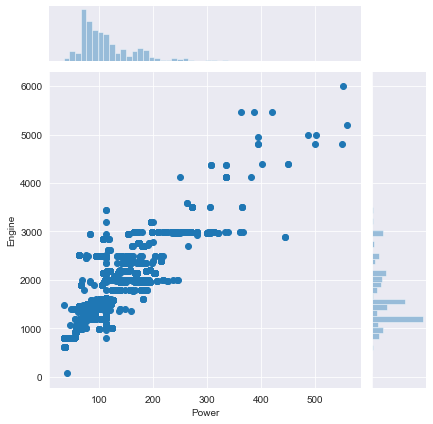

In [108]:
sns.jointplot(x='Power',y='Engine',data=train)

Inferences:
- Both Bentley and Lambhorgini have the same power almost which is more than the rest. Ambassador has the least.

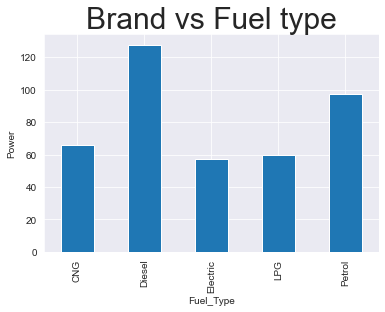

In [109]:
plt.title('Brand vs Fuel type',fontsize = 30)
plt.ylabel("Power")
train.groupby('Fuel_Type')['Power'].mean().plot.bar()

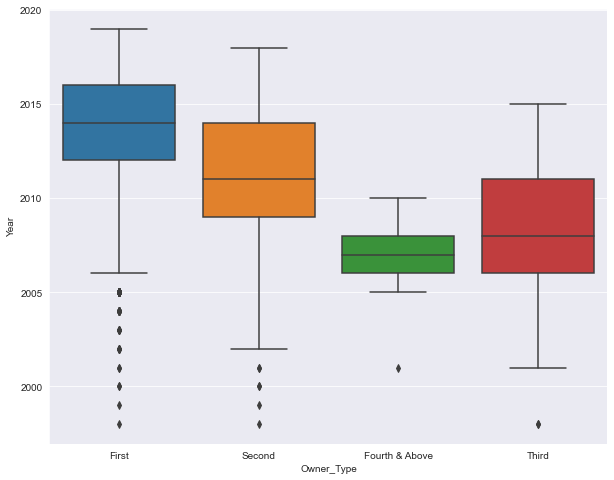

In [110]:
plt.figure(figsize=(10,8))
sns.boxplot(x='Owner_Type', y='Year', data=train, width=0.8)

In [111]:
train = train.iloc[:,:-1]
train

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.40,1248.0,74.00,5.0,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.40,1120.0,71.00,5.0,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.00,2498.0,112.00,8.0,2.90
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.90,998.0,67.10,5.0,2.65


## Labeling 

#### Here, the columns of the training data, having strings as values, are mapped from 1 to 6020 since we want each values to have some meaningful numerical value and to increase accuracy of predictions.
#### Below, every data of each columns are mapped with some values from the training dataset

In [112]:
train.Name.unique()

array(['Maruti Wagon R LXI CNG', 'Hyundai Creta 1.6 CRDi SX Option',
       'Honda Jazz V', ..., 'Volkswagen Polo IPL II 1.2 Petrol Highline',
       'Tata Bolt Revotron XT', 'Mahindra Xylo D4 BSIV'], dtype=object)

In [113]:
namemapping = {label:idx+1 for idx, label in enumerate(np.unique(train['Name']))}
namemapping.update({"Not Applicable": 0})
invnamemapping = {v : x for x, v in namemapping.items()}
train['Name'] = train['Name'].map(namemapping).astype(float)
train

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1201.0,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,513.0,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,487.0,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,1060.0,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,24.0,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,1160.0,Delhi,2014,27365,Diesel,Manual,First,28.40,1248.0,74.00,5.0,4.75
6015,669.0,Jaipur,2015,100000,Diesel,Manual,First,24.40,1120.0,71.00,5.0,4.00
6016,933.0,Jaipur,2012,55000,Diesel,Manual,Second,14.00,2498.0,112.00,8.0,2.90
6017,1208.0,Kolkata,2013,46000,Petrol,Manual,First,18.90,998.0,67.10,5.0,2.65


In [114]:
train.Location.unique()

array(['Mumbai', 'Pune', 'Chennai', 'Coimbatore', 'Hyderabad', 'Jaipur',
       'Kochi', 'Kolkata', 'Delhi', 'Bangalore', 'Ahmedabad'],
      dtype=object)

In [115]:
locationmapping = {label:idx+1 for idx, label in enumerate(np.unique(train['Location']))}
locationmapping.update({"null": 0})
invlocationmapping = {v : x for x, v in locationmapping.items()}
train['Location'] = train['Location'].map(locationmapping).astype(float)
train

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1201.0,10.0,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,513.0,11.0,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,487.0,3.0,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,1060.0,3.0,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,24.0,4.0,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,1160.0,5.0,2014,27365,Diesel,Manual,First,28.40,1248.0,74.00,5.0,4.75
6015,669.0,7.0,2015,100000,Diesel,Manual,First,24.40,1120.0,71.00,5.0,4.00
6016,933.0,7.0,2012,55000,Diesel,Manual,Second,14.00,2498.0,112.00,8.0,2.90
6017,1208.0,9.0,2013,46000,Petrol,Manual,First,18.90,998.0,67.10,5.0,2.65


In [116]:
train.Fuel_Type.unique()

array(['CNG', 'Diesel', 'Petrol', 'LPG', 'Electric'], dtype=object)

In [117]:
fueltypemapping = {label:idx+1 for idx, label in enumerate(np.unique(train['Fuel_Type']))}
fueltypemapping.update({"null": 0})
invfueltypemapping = {v : x for x, v in fueltypemapping.items()}
train['Fuel_Type'] = train['Fuel_Type'].map(fueltypemapping).astype(float)
train

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1201.0,10.0,2010,72000,1.0,Manual,First,26.60,998.0,58.16,5.0,1.75
1,513.0,11.0,2015,41000,2.0,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,487.0,3.0,2011,46000,5.0,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,1060.0,3.0,2012,87000,2.0,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,24.0,4.0,2013,40670,2.0,Automatic,Second,15.20,1968.0,140.80,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,1160.0,5.0,2014,27365,2.0,Manual,First,28.40,1248.0,74.00,5.0,4.75
6015,669.0,7.0,2015,100000,2.0,Manual,First,24.40,1120.0,71.00,5.0,4.00
6016,933.0,7.0,2012,55000,2.0,Manual,Second,14.00,2498.0,112.00,8.0,2.90
6017,1208.0,9.0,2013,46000,5.0,Manual,First,18.90,998.0,67.10,5.0,2.65


In [118]:
train.Transmission.unique()

array(['Manual', 'Automatic'], dtype=object)

In [119]:
transmissionmapping = {label:idx+1 for idx, label in enumerate(np.unique(train['Transmission']))}
transmissionmapping.update({"null": 0})
invtransmissionmapping = {v : x for x, v in transmissionmapping.items()}
train['Transmission'] = train['Transmission'].map(transmissionmapping).astype(float)
train

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1201.0,10.0,2010,72000,1.0,2.0,First,26.60,998.0,58.16,5.0,1.75
1,513.0,11.0,2015,41000,2.0,2.0,First,19.67,1582.0,126.20,5.0,12.50
2,487.0,3.0,2011,46000,5.0,2.0,First,18.20,1199.0,88.70,5.0,4.50
3,1060.0,3.0,2012,87000,2.0,2.0,First,20.77,1248.0,88.76,7.0,6.00
4,24.0,4.0,2013,40670,2.0,1.0,Second,15.20,1968.0,140.80,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,1160.0,5.0,2014,27365,2.0,2.0,First,28.40,1248.0,74.00,5.0,4.75
6015,669.0,7.0,2015,100000,2.0,2.0,First,24.40,1120.0,71.00,5.0,4.00
6016,933.0,7.0,2012,55000,2.0,2.0,Second,14.00,2498.0,112.00,8.0,2.90
6017,1208.0,9.0,2013,46000,5.0,2.0,First,18.90,998.0,67.10,5.0,2.65


In [120]:
train.Owner_Type.unique()

array(['First', 'Second', 'Fourth & Above', 'Third'], dtype=object)

In [121]:
ownertypemapping = {label:idx+1 for idx, label in enumerate(np.unique(train['Owner_Type']))}
ownertypemapping.update({"null": 0 })
invownertypemapping = {v : x for x, v in ownertypemapping.items()}
train['Owner_Type'] = train['Owner_Type'].map(ownertypemapping).astype(float)
train


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1201.0,10.0,2010,72000,1.0,2.0,1.0,26.60,998.0,58.16,5.0,1.75
1,513.0,11.0,2015,41000,2.0,2.0,1.0,19.67,1582.0,126.20,5.0,12.50
2,487.0,3.0,2011,46000,5.0,2.0,1.0,18.20,1199.0,88.70,5.0,4.50
3,1060.0,3.0,2012,87000,2.0,2.0,1.0,20.77,1248.0,88.76,7.0,6.00
4,24.0,4.0,2013,40670,2.0,1.0,3.0,15.20,1968.0,140.80,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,1160.0,5.0,2014,27365,2.0,2.0,1.0,28.40,1248.0,74.00,5.0,4.75
6015,669.0,7.0,2015,100000,2.0,2.0,1.0,24.40,1120.0,71.00,5.0,4.00
6016,933.0,7.0,2012,55000,2.0,2.0,3.0,14.00,2498.0,112.00,8.0,2.90
6017,1208.0,9.0,2013,46000,5.0,2.0,1.0,18.90,998.0,67.10,5.0,2.65


In [122]:
yearmapping = {label:idx+1 for idx, label in enumerate(np.unique(train['Year']))}
yearmapping.update({0: 0})
invyearmapping = {v : x for x, v in yearmapping.items()}
train['Year'] = train['Year'].map(yearmapping).astype(float)
train

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1201.0,10.0,13.0,72000,1.0,2.0,1.0,26.60,998.0,58.16,5.0,1.75
1,513.0,11.0,18.0,41000,2.0,2.0,1.0,19.67,1582.0,126.20,5.0,12.50
2,487.0,3.0,14.0,46000,5.0,2.0,1.0,18.20,1199.0,88.70,5.0,4.50
3,1060.0,3.0,15.0,87000,2.0,2.0,1.0,20.77,1248.0,88.76,7.0,6.00
4,24.0,4.0,16.0,40670,2.0,1.0,3.0,15.20,1968.0,140.80,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,1160.0,5.0,17.0,27365,2.0,2.0,1.0,28.40,1248.0,74.00,5.0,4.75
6015,669.0,7.0,18.0,100000,2.0,2.0,1.0,24.40,1120.0,71.00,5.0,4.00
6016,933.0,7.0,15.0,55000,2.0,2.0,3.0,14.00,2498.0,112.00,8.0,2.90
6017,1208.0,9.0,16.0,46000,5.0,2.0,1.0,18.90,998.0,67.10,5.0,2.65


In [123]:
drivenmapping = {label:idx+1 for idx, label in enumerate(np.unique(train['Kilometers_Driven']))}
drivenmapping.update({0: 0})
invdrivenmapping = {v : x for x, v in drivenmapping.items()}
train['Kilometers_Driven'] = train['Kilometers_Driven'].map(drivenmapping).astype(float)
train

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1201.0,10.0,13.0,2363.0,1.0,2.0,1.0,26.60,998.0,58.16,5.0,1.75
1,513.0,11.0,18.0,1129.0,2.0,2.0,1.0,19.67,1582.0,126.20,5.0,12.50
2,487.0,3.0,14.0,1357.0,5.0,2.0,1.0,18.20,1199.0,88.70,5.0,4.50
3,1060.0,3.0,15.0,2694.0,2.0,2.0,1.0,20.77,1248.0,88.76,7.0,6.00
4,24.0,4.0,16.0,1121.0,2.0,1.0,3.0,15.20,1968.0,140.80,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,1160.0,5.0,17.0,597.0,2.0,2.0,1.0,28.40,1248.0,74.00,5.0,4.75
6015,669.0,7.0,18.0,2829.0,2.0,2.0,1.0,24.40,1120.0,71.00,5.0,4.00
6016,933.0,7.0,15.0,1710.0,2.0,2.0,3.0,14.00,2498.0,112.00,8.0,2.90
6017,1208.0,9.0,16.0,1357.0,5.0,2.0,1.0,18.90,998.0,67.10,5.0,2.65


In [124]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   float64
 1   Location           6019 non-null   float64
 2   Year               6019 non-null   float64
 3   Kilometers_Driven  6019 non-null   float64
 4   Fuel_Type          6019 non-null   float64
 5   Transmission       6019 non-null   float64
 6   Owner_Type         6019 non-null   float64
 7   Mileage            6019 non-null   float64
 8   Engine             6019 non-null   float64
 9   Power              6019 non-null   float64
 10  Seats              6019 non-null   float64
 11  Price              6019 non-null   float64
dtypes: float64(12)
memory usage: 564.4 KB


#### Here, every data of each columns is inversed mapped in the testing dataset and mark the data not present in the mapping of training dataset previously as zero.  

In [125]:
test['Name'] = test['Name'].map(namemapping).astype(float)
test

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,963.0,Delhi,2014,40929,CNG,Manual,First,32.26,998.0,58.20000,4.0
1,953.0,Coimbatore,2013,54493,Petrol,Manual,Second,24.70,796.0,47.30000,5.0
2,NaN,Mumbai,2017,34000,Diesel,Manual,First,13.68,2393.0,147.80000,7.0
3,1720.0,Hyderabad,2012,139000,Diesel,Manual,First,23.59,1364.0,110.38042,5.0
4,759.0,Mumbai,2014,29000,Petrol,Manual,First,18.50,1197.0,82.85000,5.0
...,...,...,...,...,...,...,...,...,...,...,...
1229,1850.0,Hyderabad,2011,89411,Diesel,Manual,First,20.54,1598.0,103.60000,5.0
1230,1829.0,Mumbai,2015,59000,Petrol,Automatic,First,17.21,1197.0,103.60000,5.0
1231,1379.0,Kolkata,2012,28000,Diesel,Manual,First,23.08,1461.0,63.10000,5.0
1232,1829.0,Pune,2013,52262,Petrol,Automatic,Third,17.20,1197.0,103.60000,5.0


In [126]:
test['Location'] = test['Location'].map(locationmapping).astype(float)
test

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,963.0,5.0,2014,40929,CNG,Manual,First,32.26,998.0,58.20000,4.0
1,953.0,4.0,2013,54493,Petrol,Manual,Second,24.70,796.0,47.30000,5.0
2,NaN,10.0,2017,34000,Diesel,Manual,First,13.68,2393.0,147.80000,7.0
3,1720.0,6.0,2012,139000,Diesel,Manual,First,23.59,1364.0,110.38042,5.0
4,759.0,10.0,2014,29000,Petrol,Manual,First,18.50,1197.0,82.85000,5.0
...,...,...,...,...,...,...,...,...,...,...,...
1229,1850.0,6.0,2011,89411,Diesel,Manual,First,20.54,1598.0,103.60000,5.0
1230,1829.0,10.0,2015,59000,Petrol,Automatic,First,17.21,1197.0,103.60000,5.0
1231,1379.0,9.0,2012,28000,Diesel,Manual,First,23.08,1461.0,63.10000,5.0
1232,1829.0,11.0,2013,52262,Petrol,Automatic,Third,17.20,1197.0,103.60000,5.0


In [127]:
test['Fuel_Type'] = test['Fuel_Type'].map(fueltypemapping).astype(float)
test

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,963.0,5.0,2014,40929,1.0,Manual,First,32.26,998.0,58.20000,4.0
1,953.0,4.0,2013,54493,5.0,Manual,Second,24.70,796.0,47.30000,5.0
2,NaN,10.0,2017,34000,2.0,Manual,First,13.68,2393.0,147.80000,7.0
3,1720.0,6.0,2012,139000,2.0,Manual,First,23.59,1364.0,110.38042,5.0
4,759.0,10.0,2014,29000,5.0,Manual,First,18.50,1197.0,82.85000,5.0
...,...,...,...,...,...,...,...,...,...,...,...
1229,1850.0,6.0,2011,89411,2.0,Manual,First,20.54,1598.0,103.60000,5.0
1230,1829.0,10.0,2015,59000,5.0,Automatic,First,17.21,1197.0,103.60000,5.0
1231,1379.0,9.0,2012,28000,2.0,Manual,First,23.08,1461.0,63.10000,5.0
1232,1829.0,11.0,2013,52262,5.0,Automatic,Third,17.20,1197.0,103.60000,5.0


In [128]:
test['Transmission'] = test['Transmission'].map(transmissionmapping).astype(float)
test

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,963.0,5.0,2014,40929,1.0,2.0,First,32.26,998.0,58.20000,4.0
1,953.0,4.0,2013,54493,5.0,2.0,Second,24.70,796.0,47.30000,5.0
2,NaN,10.0,2017,34000,2.0,2.0,First,13.68,2393.0,147.80000,7.0
3,1720.0,6.0,2012,139000,2.0,2.0,First,23.59,1364.0,110.38042,5.0
4,759.0,10.0,2014,29000,5.0,2.0,First,18.50,1197.0,82.85000,5.0
...,...,...,...,...,...,...,...,...,...,...,...
1229,1850.0,6.0,2011,89411,2.0,2.0,First,20.54,1598.0,103.60000,5.0
1230,1829.0,10.0,2015,59000,5.0,1.0,First,17.21,1197.0,103.60000,5.0
1231,1379.0,9.0,2012,28000,2.0,2.0,First,23.08,1461.0,63.10000,5.0
1232,1829.0,11.0,2013,52262,5.0,1.0,Third,17.20,1197.0,103.60000,5.0


In [129]:
test['Owner_Type'] = test['Owner_Type'].map(ownertypemapping).astype(float)
test

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,963.0,5.0,2014,40929,1.0,2.0,1.0,32.26,998.0,58.20000,4.0
1,953.0,4.0,2013,54493,5.0,2.0,3.0,24.70,796.0,47.30000,5.0
2,NaN,10.0,2017,34000,2.0,2.0,1.0,13.68,2393.0,147.80000,7.0
3,1720.0,6.0,2012,139000,2.0,2.0,1.0,23.59,1364.0,110.38042,5.0
4,759.0,10.0,2014,29000,5.0,2.0,1.0,18.50,1197.0,82.85000,5.0
...,...,...,...,...,...,...,...,...,...,...,...
1229,1850.0,6.0,2011,89411,2.0,2.0,1.0,20.54,1598.0,103.60000,5.0
1230,1829.0,10.0,2015,59000,5.0,1.0,1.0,17.21,1197.0,103.60000,5.0
1231,1379.0,9.0,2012,28000,2.0,2.0,1.0,23.08,1461.0,63.10000,5.0
1232,1829.0,11.0,2013,52262,5.0,1.0,4.0,17.20,1197.0,103.60000,5.0


In [130]:
test['Year'] = test['Year'].astype(float)
test

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,963.0,5.0,2014.0,40929,1.0,2.0,1.0,32.26,998.0,58.20000,4.0
1,953.0,4.0,2013.0,54493,5.0,2.0,3.0,24.70,796.0,47.30000,5.0
2,NaN,10.0,2017.0,34000,2.0,2.0,1.0,13.68,2393.0,147.80000,7.0
3,1720.0,6.0,2012.0,139000,2.0,2.0,1.0,23.59,1364.0,110.38042,5.0
4,759.0,10.0,2014.0,29000,5.0,2.0,1.0,18.50,1197.0,82.85000,5.0
...,...,...,...,...,...,...,...,...,...,...,...
1229,1850.0,6.0,2011.0,89411,2.0,2.0,1.0,20.54,1598.0,103.60000,5.0
1230,1829.0,10.0,2015.0,59000,5.0,1.0,1.0,17.21,1197.0,103.60000,5.0
1231,1379.0,9.0,2012.0,28000,2.0,2.0,1.0,23.08,1461.0,63.10000,5.0
1232,1829.0,11.0,2013.0,52262,5.0,1.0,4.0,17.20,1197.0,103.60000,5.0


In [131]:
test['Kilometers_Driven'] = test['Kilometers_Driven'].astype(float)
test

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,963.0,5.0,2014.0,40929.0,1.0,2.0,1.0,32.26,998.0,58.20000,4.0
1,953.0,4.0,2013.0,54493.0,5.0,2.0,3.0,24.70,796.0,47.30000,5.0
2,NaN,10.0,2017.0,34000.0,2.0,2.0,1.0,13.68,2393.0,147.80000,7.0
3,1720.0,6.0,2012.0,139000.0,2.0,2.0,1.0,23.59,1364.0,110.38042,5.0
4,759.0,10.0,2014.0,29000.0,5.0,2.0,1.0,18.50,1197.0,82.85000,5.0
...,...,...,...,...,...,...,...,...,...,...,...
1229,1850.0,6.0,2011.0,89411.0,2.0,2.0,1.0,20.54,1598.0,103.60000,5.0
1230,1829.0,10.0,2015.0,59000.0,5.0,1.0,1.0,17.21,1197.0,103.60000,5.0
1231,1379.0,9.0,2012.0,28000.0,2.0,2.0,1.0,23.08,1461.0,63.10000,5.0
1232,1829.0,11.0,2013.0,52262.0,5.0,1.0,4.0,17.20,1197.0,103.60000,5.0


In [132]:
test['Name'].fillna(0.0, inplace=True)
test['Location'].fillna(0.0, inplace=True)
test['Year'].fillna(0.0, inplace=True)
test['Kilometers_Driven'].fillna(0.0, inplace=True)
test['Fuel_Type'].fillna(0.0, inplace=True)
test['Power'].fillna(0.0, inplace=True)
test['Transmission'].fillna(0.0, inplace=True)
test['Owner_Type'].fillna(0.0, inplace=True)
test['Seats'].fillna(0.0, inplace=True)

In [133]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               1234 non-null   float64
 1   Location           1234 non-null   float64
 2   Year               1234 non-null   float64
 3   Kilometers_Driven  1234 non-null   float64
 4   Fuel_Type          1234 non-null   float64
 5   Transmission       1234 non-null   float64
 6   Owner_Type         1234 non-null   float64
 7   Mileage            1234 non-null   float64
 8   Engine             1234 non-null   float64
 9   Power              1234 non-null   float64
 10  Seats              1234 non-null   float64
dtypes: float64(11)
memory usage: 106.2 KB


### Heatmap to show the relationships of the variables using Correlation Matrix 

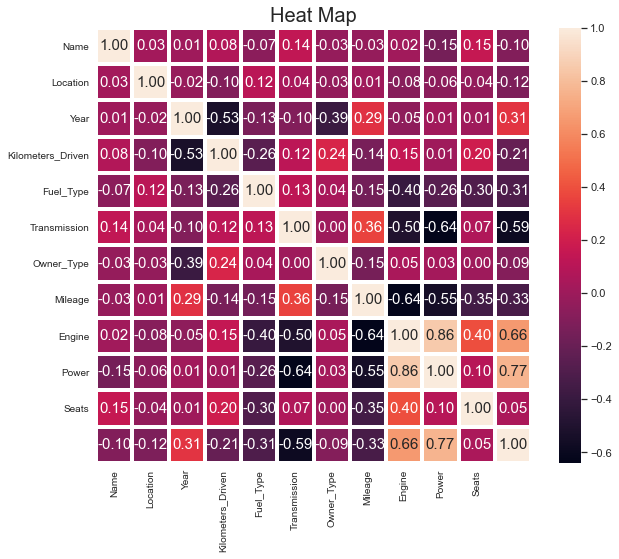

In [134]:
cols=[ 'Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats']
plt.figure(figsize=(10,8))
plt.title('Heat Map', fontsize=20)
sns.set(font_scale=1.0)
sns.heatmap(train.corr(), cbar=True, annot =True, square=True, fmt='.2f',annot_kws={'size':15},yticklabels=cols,xticklabels=cols, linewidth=3)

## EVALUATION

### Model 1:  LINEAR REGRESSION 
### Training Data

In [135]:
from sklearn.linear_model import LinearRegression
x_lr = train.iloc[:, :-1].values
y_lr = train['Price'].values
xtrain_lr, xtest_lr, ytrain_lr, ytest_lr = train_test_split(x_lr, y_lr, test_size=0.3, random_state=1)
lr = LinearRegression()
lr.fit(xtrain_lr, ytrain_lr)
ytrainpredict_lr = lr.predict(xtrain_lr)
ytestpredict_lr = lr.predict(xtest_lr)

In [136]:
print(f'MAE train: {metrics.mean_absolute_error(ytrain_lr, ytrainpredict_lr)}, test: {metrics.mean_absolute_error(ytest_lr, ytestpredict_lr)}')
print(f'RMSE train: {np.sqrt(metrics.mean_squared_error(ytrain_lr, ytrainpredict_lr))}, test: {np.sqrt(metrics.mean_squared_error(ytest_lr, ytestpredict_lr))}')
print(f'R^2 train: {(r2_score(ytrain_lr, ytrainpredict_lr))}, test: {(r2_score(ytest_lr, ytestpredict_lr))}')
print(f'MSE train: {(mean_squared_error(ytrain_lr, ytrainpredict_lr))}, test: {(mean_squared_error(ytest_lr, ytestpredict_lr))}')

MAE train: 3.774559864499169, test: 3.5588136042796887
RMSE train: 6.287908025749571, test: 5.527333412719973
R^2 train: 0.6907902149844369, test: 0.7427342318417769
MSE train: 39.537787340285874, test: 30.55141465537063


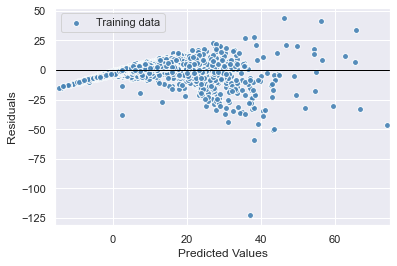

In [137]:
sns.set(font_scale=1.0)
plt.scatter(ytrainpredict_lr, ytrainpredict_lr - ytrain_lr, c='steelblue', marker='o', edgecolors='white', s=35, alpha=0.9, label="Training data")
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=ytrainpredict_lr.min()-2, xmax=ytrainpredict_lr.max()+5, lw=1, color='black')
plt.xlim([ytrainpredict_lr.min()-1, ytrainpredict_lr.max()+1])
plt.show()

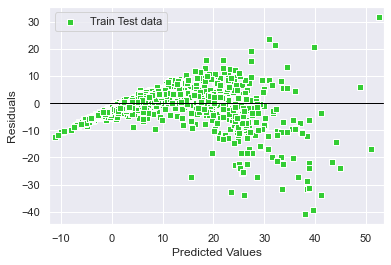

In [138]:
plt.scatter(ytestpredict_lr, ytestpredict_lr-ytest_lr, c='limegreen', marker='s', edgecolors='white', s=30, alpha=0.99, label="Train Test data")
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=ytestpredict_lr.min()-1, xmax=ytestpredict_lr.max()+1, lw=1, color='black')
plt.xlim([ytestpredict_lr.min()-1, ytestpredict_lr.max()+1])
plt.show()

In [139]:
print(lr.intercept_)

0.08356050341683563


In [140]:
cols=[ 'Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats']
coeff_df = pd.DataFrame(lr.coef_,cols,columns=['Coefficient'])
coeff_df

,Coefficient
Name,0.000137
Location,-0.237382
Year,0.758469
Kilometers_Driven,-0.001637
Fuel_Type,-0.997015
Transmission,-2.444360
Owner_Type,-0.010903
Mileage,-0.148774
Engine,0.001103
Power,0.122569


Interpreting the coefficients:
- Holding all other features fixed, a 1 unit increase in **Year** is associated with an **increase of Rs. 0.758469 lakhs**.
- Holding all other features fixed, a 1 unit increase in **Kilometers_Driven** is associated with an **decrease of Rs. 0.001637 lakhs**.
- Holding all other features fixed, **Going from Automatic to Manual** is associated with an **decrease of Rs. 2.444360 lakhs**.
- Holding all other features fixed, a 1 unit increase in **Mileage** is associated with an **decrease of Rs. 0.148774 lakhs**.
- Holding all other features fixed, a 1 unit increase in **Engine** is associated with an **increase of Rs. 0.001103 lakhs**.
- Holding all other features fixed, a 1 unit increase in **Power** is associated with an **increase of Rs. 0.122569 lakhs**.
- Holding all other features fixed, a 1 unit increase in **Seats** is associated with an **decrease of Rs. 0.825729 lakhs**.

### Model 2 : LINEAR REGRESSION (REMOVING OUTLIERS)
### Training Data

In [141]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RANSACRegressor

In [142]:
ransac = RANSACRegressor(LinearRegression(), max_trials =100, min_samples=4213, loss='absolute_loss', residual_threshold=5.0, random_state=0)
# min_samples is integer value of 0.75 * 6019

In [143]:
x_r = train.iloc[:, :-1].values
y_r = train['Price'].values
xtrain_r, xtest_r, ytrain_r, ytest_r = train_test_split(x_r, y_r, test_size=0.3, random_state=1)
ransac.fit(xtrain_r, ytrain_r)
inlier = ransac.inlier_mask_
inlier.size

4213

In [144]:
lr = LinearRegression()
lr.fit(xtrain_r[inlier], ytrain_lr[inlier])
ytrainpredict_lr = lr.predict(xtrain_lr)
ytestpredict_lr = lr.predict(xtest_lr)

In [145]:
print(f'MAE train: {metrics.mean_absolute_error(ytrain_lr, ytrainpredict_lr)}, test: {metrics.mean_absolute_error(ytest_lr, ytestpredict_lr)}')
print(f'RMSE train: {np.sqrt(metrics.mean_squared_error(ytrain_lr, ytrainpredict_lr))}, test: {np.sqrt(metrics.mean_squared_error(ytest_lr, ytestpredict_lr))}')
print(f'R^2 train: {(r2_score(ytrain_lr, ytrainpredict_lr))}, test: {(r2_score(ytest_lr, ytestpredict_lr))}')
print(f'MSE train: {(mean_squared_error(ytrain_lr, ytrainpredict_lr))}, test: {(mean_squared_error(ytest_lr, ytestpredict_lr))}')

MAE train: 3.446606925667735, test: 3.29463641202884
RMSE train: 6.461570041882088, test: 5.761398248282165
R^2 train: 0.6734745923504251, test: 0.7204841301230953
MSE train: 41.75188740614809, test: 33.193709775308804


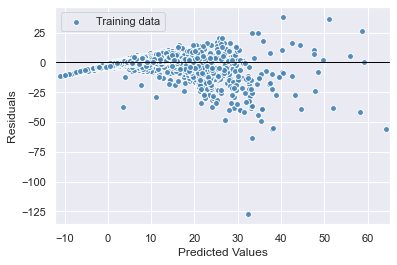

In [146]:
sns.set(font_scale=1.0)
plt.scatter(ytrainpredict_lr, ytrainpredict_lr - ytrain_lr, c='steelblue', marker='o', edgecolors='white', s=35, alpha=0.9, label="Training data")
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=ytrainpredict_lr.min()-2, xmax=ytrainpredict_lr.max()+5, lw=1, color='black')
plt.xlim([ytrainpredict_lr.min()-1, ytrainpredict_lr.max()+1])
plt.show()

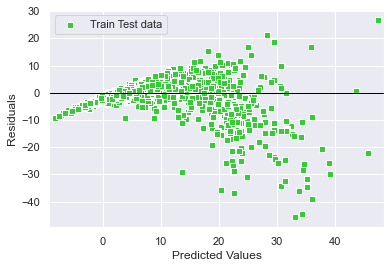

In [147]:
plt.scatter(ytestpredict_lr, ytestpredict_lr-ytest_lr, c='limegreen', marker='s', edgecolors='white', s=30, alpha=0.99, label="Train Test data")
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=ytestpredict_lr.min()-1, xmax=ytestpredict_lr.max()+1, lw=1, color='black')
plt.xlim([ytestpredict_lr.min()-1, ytestpredict_lr.max()+1])
plt.show()

In [148]:
print(lr.intercept_)

-1.4083510276580435


In [149]:
cols=[ 'Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats']
coeff_df = pd.DataFrame(lr.coef_,cols,columns=['Coefficient'])
coeff_df

,Coefficient
Name,0.000058
Location,-0.183203
Year,0.598566
Kilometers_Driven,-0.000932
Fuel_Type,-0.732404
Transmission,-2.666072
Owner_Type,-0.083151
Mileage,-0.071795
Engine,0.001326
Power,0.106093


Interpreting the coefficients:
- Holding all other features fixed, a 1 unit increase in **Year** is associated with an **increase of Rs. 0.598566 lakhs**.
- Holding all other features fixed, a 1 unit increase in **Kilometers_Driven** is associated with an **decrease of Rs. 0.000932 lakhs**.
- Holding all other features fixed, **Going from Automatic to Manual** is associated with an **decrease of Rs. 2.666072 lakhs**.
- Holding all other features fixed, a 1 unit increase in **Mileage** is associated with an **decrease of Rs. 0.071795 lakhs**.
- Holding all other features fixed, a 1 unit increase in **Engine** is associated with an **increase of Rs. 0.001326 lakhs**.
- Holding all other features fixed, a 1 unit increase in **Power** is associated with an **increase of Rs. 0.106093 lakhs**.
- Holding all other features fixed, a 1 unit increase in **Seats** is associated with an **decrease of Rs. 0.490021 lakhs**.

## Model 3: LINEAR REGRESSION (RIDGE REGRESSION)
### Training Data

In [150]:
from sklearn.linear_model import Ridge

x_rd = train.iloc[:, :-1].values
y_rd = train['Price'].values
xtrain_rd, xtest_rd, ytrain_rd, ytest_rd = train_test_split(x_rd, y_rd, test_size=0.3, random_state=1)
rd = Ridge(alpha=1.0)
rd.fit(xtrain_rd, ytrain_rd)
ytrainpredict_rd = rd.predict(xtrain_rd)
ytestpredict_rd = rd.predict(xtest_rd)

In [151]:
print(f'MAE train: {metrics.mean_absolute_error(ytrain_rd, ytrainpredict_rd)}, test: {metrics.mean_absolute_error(ytest_rd, ytestpredict_rd)}')
print(f'RMSE train: {np.sqrt(metrics.mean_squared_error(ytrain_rd, ytrainpredict_rd))}, test: {np.sqrt(metrics.mean_squared_error(ytest_rd, ytestpredict_rd))}')
print(f'R^2 train: {(r2_score(ytrain_rd, ytrainpredict_rd))}, test: {(r2_score(ytest_rd, ytestpredict_rd))}')
print(f'MSE train: {(mean_squared_error(ytrain_rd, ytrainpredict_rd))}, test: {(mean_squared_error(ytest_rd, ytestpredict_rd))}')

MAE train: 3.774588468693105, test: 3.558843993438383
RMSE train: 6.287908255693104, test: 5.527393252879979
R^2 train: 0.6907901923693506, test: 0.7427286613769921
MSE train: 39.53779023201349, test: 30.552076171983117


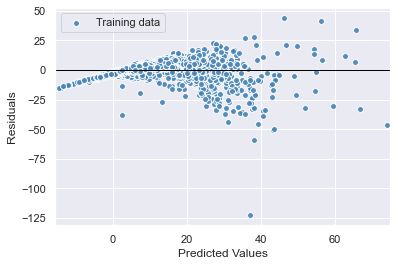

In [152]:
plt.scatter(ytrainpredict_rd, ytrainpredict_rd-ytrain_rd, c='steelblue', marker='o', edgecolors='white', s=35, alpha=0.9, label="Training data")
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=ytrainpredict_rd.min()-2, xmax=ytrainpredict_rd.max()+5, lw=1, color='black')
plt.xlim([ytrainpredict_rd.min()-1, ytrainpredict_rd.max()+1])
plt.show()

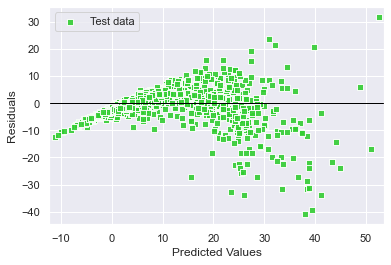

In [153]:
plt.scatter(ytestpredict_rd, ytestpredict_rd-ytest_rd, c='limegreen', marker='s', edgecolors='white', s=35, alpha=0.9, label="Test data")
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=ytestpredict_rd.min()-1, xmax=ytestpredict_rd.max()+1, lw=1, color='black')
plt.xlim([ytestpredict_rd.min()-1, ytestpredict_rd.max()+1])
plt.show()

In [154]:
print(rd.intercept_)

0.07138524027406845


In [155]:
cols=[ 'Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats']
coeff_df = pd.DataFrame(rd.coef_,cols,columns=['Coefficient'])
coeff_df

,Coefficient
Name,0.000137
Location,-0.237386
Year,0.758493
Kilometers_Driven,-0.001637
Fuel_Type,-0.996910
Transmission,-2.439466
Owner_Type,-0.010856
Mileage,-0.148787
Engine,0.001102
Power,0.122601


Interpreting the coefficients:
- Holding all other features fixed, a 1 unit increase in **Year** is associated with an **increase of Rs.0.758493 lakhs**.
- Holding all other features fixed, a 1 unit increase in **Kilometers_Driven** is associated with an **decrease of Rs. 0.001637 lakhs**.
- Holding all other features fixed, **Going from Automatic to Manual** is associated with an **decrease of Rs. 2.439466 lakhs**.
- Holding all other features fixed, a 1 unit increase in **Mileage** is associated with an **decrease of Rs. 0.148787 lakhs**.
- Holding all other features fixed, a 1 unit increase in **Engine** is associated with an **increase of Rs. 0.001102 lakhs**.
- Holding all other features fixed, a 1 unit increase in **Power** is associated with an **increase of Rs. 0.122601 lakhs**.
- Holding all other features fixed, a 1 unit increase in **Seats** is associated with an **decrease of Rs. 0.825532 lakhs**.

## Model 4: LINEAR REGRESSION (LASSO)
### Training Data

In [156]:
from sklearn.linear_model import Lasso

x_ls = train.iloc[:, :-1].values
y_ls = train['Price'].values
xtrain_ls, xtest_ls, ytrain_ls, ytest_ls = train_test_split(x_ls, y_ls, test_size=0.3, random_state=1)
ls = Ridge(alpha=1.0)
ls.fit(xtrain_rd, ytrain_ls)
ytrainpredict_ls = rd.predict(xtrain_ls)
ytestpredict_ls = rd.predict(xtest_ls)

In [157]:
print(f'MAE train: {metrics.mean_absolute_error(ytrain_ls, ytrainpredict_ls)}, test: {metrics.mean_absolute_error(ytest_ls, ytestpredict_ls)}')
print(f'RMSE train: {np.sqrt(metrics.mean_squared_error(ytrain_ls, ytrainpredict_ls))}, test: {np.sqrt(metrics.mean_squared_error(ytest_ls, ytestpredict_ls))}')
print(f'R^2 train: {(r2_score(ytrain_ls, ytrainpredict_ls))}, test: {(r2_score(ytest_ls, ytestpredict_ls))}')
print(f'MSE train: {(mean_squared_error(ytrain_ls, ytrainpredict_ls))}, test: {(mean_squared_error(ytest_ls, ytestpredict_ls))}')

MAE train: 3.774588468693105, test: 3.558843993438383
RMSE train: 6.287908255693104, test: 5.527393252879979
R^2 train: 0.6907901923693506, test: 0.7427286613769921
MSE train: 39.53779023201349, test: 30.552076171983117


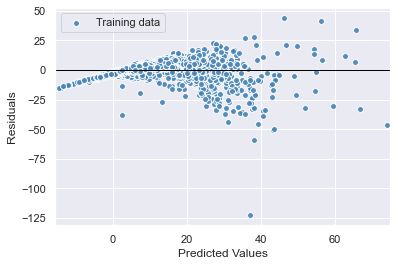

In [158]:
plt.scatter(ytrainpredict_ls, ytrainpredict_ls-ytrain_ls, c='steelblue', marker='o', edgecolors='white', s=35, alpha=0.9, label="Training data")
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=ytrainpredict_ls.min()-2, xmax=ytrainpredict_ls.max()+5, lw=1, color='black')
plt.xlim([ytrainpredict_ls.min()-1, ytrainpredict_ls.max()+1])
plt.show()

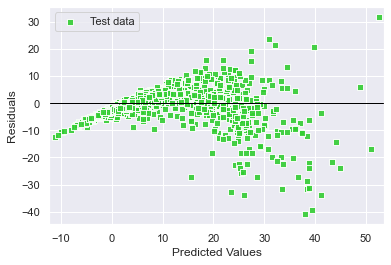

In [159]:
plt.scatter(ytestpredict_ls, ytestpredict_ls-ytest_ls, c='limegreen', marker='s', edgecolors='white', s=35, alpha=0.9, label="Test data")
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=ytestpredict_ls.min()-1, xmax=ytestpredict_ls.max()+1, lw=1, color='black')
plt.xlim([ytestpredict_ls.min()-1, ytestpredict_ls.max()+1])
plt.show()

In [160]:
print(ls.intercept_)

0.07138524027406845


In [161]:
cols=[ 'Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats']
coeff_df = pd.DataFrame(ls.coef_,cols,columns=['Coefficient'])
coeff_df

,Coefficient
Name,0.000137
Location,-0.237386
Year,0.758493
Kilometers_Driven,-0.001637
Fuel_Type,-0.996910
Transmission,-2.439466
Owner_Type,-0.010856
Mileage,-0.148787
Engine,0.001102
Power,0.122601


Interpreting the coefficients:
- Holding all other features fixed, a 1 unit increase in **Year** is associated with an **increase of Rs. 0.598566 lakhs**.
- Holding all other features fixed, a 1 unit increase in **Kilometers_Driven** is associated with an **decrease of Rs. 0.000932 lakhs**.
- Holding all other features fixed, **Going from Automatic to Manual** is associated with an **decrease of Rs. 2.666072 lakhs**.
- Holding all other features fixed, a 1 unit increase in **Mileage** is associated with an **decrease of Rs. 0.148787 lakhs**.
- Holding all other features fixed, a 1 unit increase in **Engine** is associated with an **increase of Rs. 0.001102 lakhs**.
- Holding all other features fixed, a 1 unit increase in **Power** is associated with an **increase of Rs. 0.122601 lakhs**.
- Holding all other features fixed, a 1 unit increase in **Seats** is associated with an **decrease of Rs. 0.825532 lakhs**.

## Model 5: RANDOM FOREST REGRESSION
### Training Data

In [162]:
from sklearn.ensemble import RandomForestRegressor
x_rf = train.iloc[:, :-1].values
y_rf = train['Price'].values
xtrain_rf, xtest_rf, ytrain_rf, ytest_rf = train_test_split(x_rf, y_rf, test_size=0.3, random_state=1)

forest_rf = RandomForestRegressor(n_estimators=1000, criterion='mse', random_state=1, n_jobs=-1)
forest_rf.fit(xtrain_rf, ytrain_rf)
ytrainpredict_rf = forest_rf.predict(xtrain_rf)
ytestpredict_rf = forest_rf.predict(xtest_rf)

In [163]:
print(f'MAE train: {metrics.mean_absolute_error(ytrain_rf, ytrainpredict_rf)}, test: {metrics.mean_absolute_error(ytest_rf, ytestpredict_rf)}')
print(f'RMSE train: {np.sqrt(metrics.mean_squared_error(ytrain_rf, ytrainpredict_rf))}, test: {np.sqrt(metrics.mean_squared_error(ytest_rf, ytestpredict_rf))}')
print(f'R^2 train: {(r2_score(ytrain_rf, ytrainpredict_rf))}, test: {(r2_score(ytest_rf, ytestpredict_rf))}')
print(f'MSE train: {(mean_squared_error(ytrain_rf, ytrainpredict_rf))}, test: {(mean_squared_error(ytest_rf, ytestpredict_rf))}')

MAE train: 0.5936819076676878, test: 1.4356096913726721
RMSE train: 1.5051431320697548, test: 3.070093339990447
R^2 train: 0.9822827436017454, test: 0.9206304647800843
MSE train: 2.2654558480167513, test: 9.425473116253698


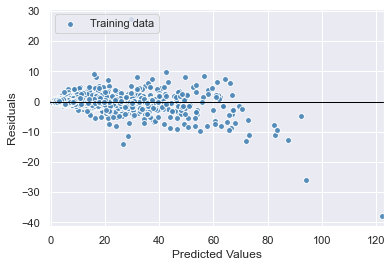

In [164]:
plt.scatter(ytrainpredict_rf, ytrainpredict_rf-ytrain_rf, c='steelblue', marker='o', edgecolors='white', s=35, alpha=0.9, label="Training data")
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=ytrainpredict_rf.min()-2, xmax=ytrainpredict_rf.max()+5, lw=1, color='black')
plt.xlim([ytrainpredict_rf.min()-1, ytrainpredict_rf.max()+1])
plt.show()

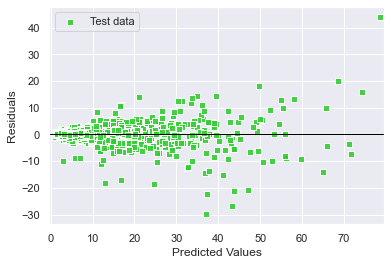

In [165]:
plt.scatter(ytestpredict_rf, ytestpredict_rf-ytest_rf, c='limegreen', marker='s', edgecolors='white', s=35, alpha=0.9, label="Test data")
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=ytestpredict_rf.min()-1, xmax=ytestpredict_rf.max()+1, lw=1, color='black')
plt.xlim([ytestpredict_rf.min()-1, ytestpredict_rf.max()+1])
plt.show()

## Model 6: KNN
### Training Data

In [166]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
x_kk = train.iloc[:, :-1].values
y_kk = train['Price'].values
xtrain_kk, xtest_kk, ytrain_kk, ytest_kk = train_test_split(x_kk, y_kk, test_size=0.3, random_state=1)
L=[];
for i in range(3,15,2):
    M=[];
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(xtrain_kk, ytrain_kk)
    y_pred = knn.predict(xtest_kk)
    rmse = np.sqrt(mean_squared_error(ytest_kk, y_pred))
    M.append(i);
    M.append(rmse);
    L.append(M);

In [167]:
min=L[0];
for i in range(len(L)):
    if L[i][1]<min[1]:
        min=L[i];
n=min[0];
print(n);

3


- The best value for KNN is n=5

In [168]:
knn = KNeighborsRegressor(n_neighbors=n)
knn.fit(xtrain_kk, ytrain_kk)
ytrainpredict_kk = knn.predict(xtrain_kk)
ytestpredict_kk = knn.predict(xtest_kk)

In [169]:
print(f'MAE train: {metrics.mean_absolute_error(ytrain_kk, ytrainpredict_kk)}, test: {metrics.mean_absolute_error(ytest_kk, ytestpredict_kk)}')
print(f'RMSE train: {np.sqrt(metrics.mean_squared_error(ytrain_kk, ytrainpredict_kk))}, test: {np.sqrt(metrics.mean_squared_error(ytest_kk, ytestpredict_kk))}')
print(f'R^2 train: {(r2_score(ytrain_kk, ytrainpredict_kk))}, test: {(r2_score(ytest_kk, ytestpredict_kk))}')
print(f'MSE train: {(mean_squared_error(ytrain_kk, ytrainpredict_kk))}, test: {(mean_squared_error(ytest_kk, ytestpredict_kk))}')

MAE train: 2.2450233404541495, test: 2.969665928386859
RMSE train: 4.5456485145996535, test: 5.576414046681971
R^2 train: 0.8384032691222301, test: 0.738145101238326
MSE train: 20.662920418282038, test: 31.096393620031993


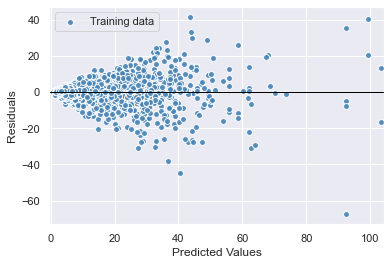

In [170]:
plt.scatter(ytrainpredict_kk, ytrainpredict_kk-ytrain_kk, c='steelblue', marker='o', edgecolors='white', s=35, alpha=0.9, label="Training data")
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=ytrainpredict_kk.min()-2, xmax=ytrainpredict_kk.max()+5, lw=1, color='black')
plt.xlim([ytrainpredict_kk.min()-1, ytrainpredict_kk.max()+1])
plt.show()

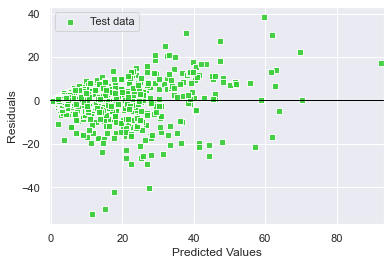

In [171]:
plt.scatter(ytestpredict_kk, ytestpredict_kk-ytest_kk, c='limegreen', marker='s', edgecolors='white', s=35, alpha=0.9, label="Test data")
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=ytestpredict_kk.min()-1, xmax=ytestpredict_kk.max()+1, lw=1, color='black')
plt.xlim([ytestpredict_kk.min()-1, ytestpredict_kk.max()+1])
plt.show()

### Inferences:
 - From the above five models, it will be our best interest to use Random Forest Regression Model for our objective.

## PREDICTION
### Random Forest Regression Model has been used for predicting the costs of used cars given the data collected from various sources and distributed across various locations in India.

In [172]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               1234 non-null   float64
 1   Location           1234 non-null   float64
 2   Year               1234 non-null   float64
 3   Kilometers_Driven  1234 non-null   float64
 4   Fuel_Type          1234 non-null   float64
 5   Transmission       1234 non-null   float64
 6   Owner_Type         1234 non-null   float64
 7   Mileage            1234 non-null   float64
 8   Engine             1234 non-null   float64
 9   Power              1234 non-null   float64
 10  Seats              1234 non-null   float64
dtypes: float64(11)
memory usage: 106.2 KB


In [173]:
x_testdata_rf = test.iloc[:, :].values
ytestpredict_rf = forest_rf.predict(x_testdata_rf)
test["Predicted Price(Random Forest)"] = ytestpredict_rf
test

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Predicted Price(Random Forest)
0,963.0,5.0,2014.0,40929.0,1.0,2.0,1.0,32.26,998.0,58.20000,4.0,4.029560
1,953.0,4.0,2013.0,54493.0,5.0,2.0,3.0,24.70,796.0,47.30000,5.0,3.989630
2,0.0,10.0,2017.0,34000.0,2.0,2.0,1.0,13.68,2393.0,147.80000,7.0,20.039270
3,1720.0,6.0,2012.0,139000.0,2.0,2.0,1.0,23.59,1364.0,110.38042,5.0,9.981087
4,759.0,10.0,2014.0,29000.0,5.0,2.0,1.0,18.50,1197.0,82.85000,5.0,5.908500
...,...,...,...,...,...,...,...,...,...,...,...,...
1229,1850.0,6.0,2011.0,89411.0,2.0,2.0,1.0,20.54,1598.0,103.60000,5.0,8.897760
1230,1829.0,10.0,2015.0,59000.0,5.0,1.0,1.0,17.21,1197.0,103.60000,5.0,8.639430
1231,1379.0,9.0,2012.0,28000.0,2.0,2.0,1.0,23.08,1461.0,63.10000,5.0,4.140680
1232,1829.0,11.0,2013.0,52262.0,5.0,1.0,4.0,17.20,1197.0,103.60000,5.0,8.515060


### After inverse mapping and converting some some floats to integers, we get the following:

In [174]:
test['Name'] = test['Name'].map(invnamemapping).astype(object)
test['Location'] = test['Location'].map(invlocationmapping).astype(object)
test['Year'] = test['Year'].astype(int)
test['Kilometers_Driven'] = test['Kilometers_Driven'].astype(int)
test['Fuel_Type'] = test['Fuel_Type'].map(invfueltypemapping).astype(object)
test['Transmission'] = test['Transmission'].map(invtransmissionmapping).astype(object)
test['Owner_Type'] = test['Owner_Type'].map(invownertypemapping).astype(object)

In [175]:
test

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Predicted Price(Random Forest)
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26,998.0,58.20000,4.0,4.029560
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.70,796.0,47.30000,5.0,3.989630
2,Not Applicable,Mumbai,2017,34000,Diesel,Manual,First,13.68,2393.0,147.80000,7.0,20.039270
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59,1364.0,110.38042,5.0,9.981087
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.50,1197.0,82.85000,5.0,5.908500
...,...,...,...,...,...,...,...,...,...,...,...,...
1229,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54,1598.0,103.60000,5.0,8.897760
1230,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21,1197.0,103.60000,5.0,8.639430
1231,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08,1461.0,63.10000,5.0,4.140680
1232,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.20,1197.0,103.60000,5.0,8.515060
